## t-SNE

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [23]:
questions = pd.read_csv("../profiles/question_counts.csv", encoding='latin1')
user_counts = questions.sample(20_000)

In [24]:
user_questions_normalized = StandardScaler().fit_transform(user_counts.drop(["Id"],axis=1,inplace=False))

In [25]:
from sklearn.manifold import TSNE
principalComponents = TSNE(n_components=2).fit_transform(user_questions_normalized)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
targeted_users = user_counts[(user_counts['ios'] > 5)].index.tolist()
targeted_users_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users]
targeted_plot_users = principalDf[principalDf.index.isin(targeted_users_index)]

In [27]:
targeted_users_2 = user_counts[(user_counts['android'] > 5)].index.tolist()
targeted_users_2_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_2]
targeted_plot_users_2 = principalDf[principalDf.index.isin(targeted_users_2_index)]

In [28]:
targeted_users_3 = user_counts[(user_counts['java'] > 5)].index.tolist()
targeted_users_3_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_3]
targeted_plot_users_3 = principalDf[principalDf.index.isin(targeted_users_3_index)]

In [29]:
targeted_users_4 = user_counts[(user_counts['c#'] > 5)].index.tolist()
targeted_users_4_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_4]
targeted_plot_users_4 = principalDf[principalDf.index.isin(targeted_users_4_index)]

In [32]:
targeted_users_5 = user_counts[(user_counts['php'] > 5)].index.tolist()
targeted_users_5_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_5]
targeted_plot_users_5 = principalDf[principalDf.index.isin(targeted_users_5_index)]

In [35]:
targeted_users_6 = user_counts[(user_counts['ruby-on-rails'] > 5)].index.tolist()
targeted_users_6_index = [user_counts.index.get_loc(targeted_user) for targeted_user in targeted_users_6]
targeted_plot_users_6 = principalDf[principalDf.index.isin(targeted_users_6_index)]

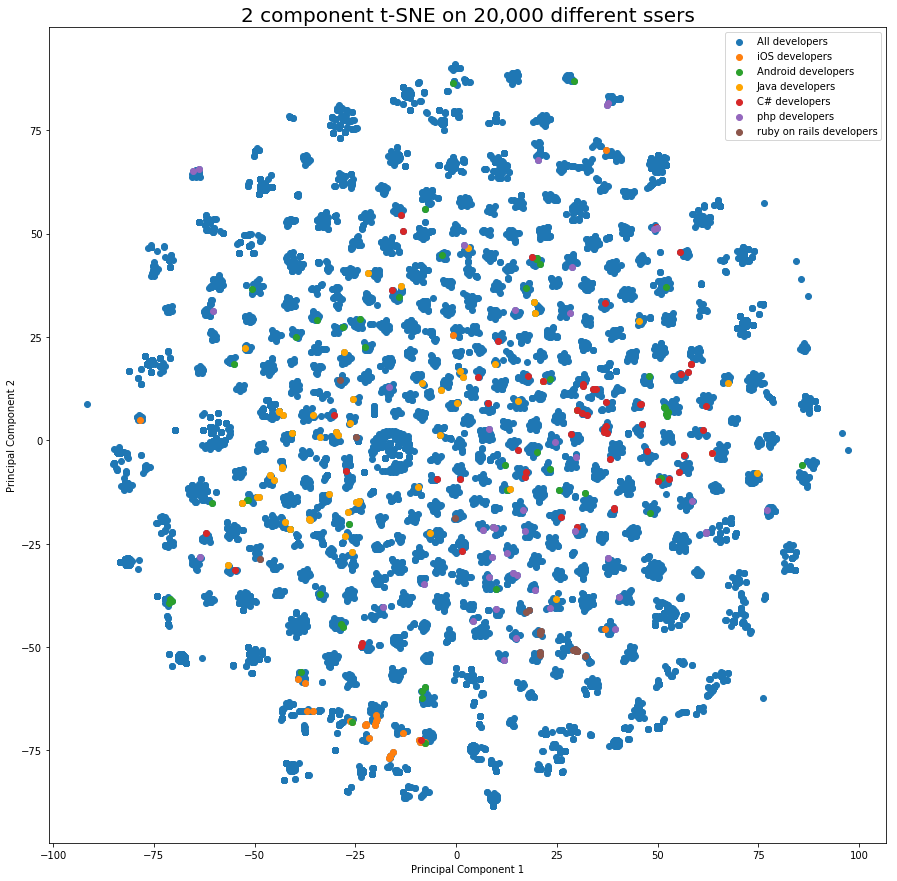

In [39]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component t-SNE on 20,000 different ssers', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
ax.scatter(targeted_plot_users['principal component 1'], targeted_plot_users['principal component 2'])
ax.scatter(targeted_plot_users_2['principal component 1'], targeted_plot_users_2['principal component 2'])
ax.scatter(targeted_plot_users_3['principal component 1'], targeted_plot_users_3['principal component 2'],c='orange')
ax.scatter(targeted_plot_users_4['principal component 1'], targeted_plot_users_4['principal component 2'])
ax.scatter(targeted_plot_users_5['principal component 1'], targeted_plot_users_5['principal component 2'])
ax.scatter(targeted_plot_users_6['principal component 1'], targeted_plot_users_6['principal component 2'])
ax.legend(['All developers', 'iOS developers', 'Android developers', 'Java developers', 'C# developers', 'php developers', 'ruby on rails developers'])
plt.show()